In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('../bodyPerformance.csv')

In [3]:
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [4]:
# creating dummies valuable for gender
df['gender'] = pd.get_dummies(df['gender'],drop_first= True)

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()

In [7]:
scaler.fit(df.drop(['class'],axis=1))

StandardScaler()

In [8]:
scaled_features = scaler.transform(df.drop(['class'],axis=1))

In [9]:
df.columns

Index(['age', 'gender', 'height_cm', 'weight_kg', 'body fat_%', 'diastolic',
       'systolic', 'gripForce', 'sit and bend forward_cm', 'sit-ups counts',
       'broad jump_cm', 'class'],
      dtype='object')

In [10]:
df_feat = pd.DataFrame(scaled_features,columns=[['age', 'gender','height_cm', 'weight_kg', 'body fat_%', 'diastolic',
       'systolic', 'gripForce', 'sit and bend forward_cm', 'sit-ups counts',
       'broad jump_cm']])
df_feat.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
0,-0.717432,0.76275,0.443873,0.652150,-0.267367,0.112009,-0.015959,1.688190,0.377317,1.416961,0.674009
1,-0.864220,0.76275,-0.422465,-0.974734,-1.039081,-0.167278,-0.287820,-0.053073,0.128984,0.926634,0.975013
2,-0.423857,0.76275,1.310211,0.883127,-0.432734,1.229158,1.479276,0.737554,-0.379509,0.646446,-0.229005
3,-0.350463,0.76275,0.704961,0.305684,-0.667004,-0.260374,1.139450,0.417538,-0.001096,0.926634,0.724176
4,-0.644038,0.76275,0.621888,0.021147,-0.846152,-0.818948,-0.219855,0.615195,1.406129,0.366259,0.674009


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['class'],test_size=0.30)

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
knn = KNeighborsClassifier(n_neighbors=1)

In [15]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [16]:
pred = knn.predict(X_test)

In [17]:
from sklearn.metrics import classification_report,confusion_matrix

In [18]:
print(confusion_matrix(y_test,pred))

[[613 262  91  20]
 [302 455 224  55]
 [119 319 438 109]
 [ 24  96 206 685]]


In [19]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           A       0.58      0.62      0.60       986
           B       0.40      0.44      0.42      1036
           C       0.46      0.44      0.45       985
           D       0.79      0.68      0.73      1011

    accuracy                           0.55      4018
   macro avg       0.56      0.55      0.55      4018
weighted avg       0.56      0.55      0.55      4018



In [20]:
error_rate = []

# Will take some time
for i in range(1,50):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

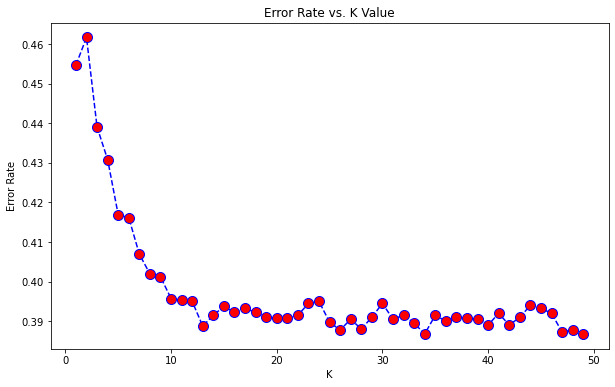

In [21]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [22]:
knn = KNeighborsClassifier(n_neighbors=35)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=23')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=23


[[807 168   9   2]
 [363 488 161  24]
 [117 324 507  37]
 [ 17  76 275 643]]


              precision    recall  f1-score   support

           A       0.62      0.82      0.70       986
           B       0.46      0.47      0.47      1036
           C       0.53      0.51      0.52       985
           D       0.91      0.64      0.75      1011

    accuracy                           0.61      4018
   macro avg       0.63      0.61      0.61      4018
weighted avg       0.63      0.61      0.61      4018



In [23]:
from sklearn.svm import SVC

In [24]:
model = SVC()

In [25]:
model.fit(X_train,y_train)

SVC()

In [26]:
predictions = model.predict(X_test)

In [27]:
print(confusion_matrix(y_test,predictions))

[[786 190   5   5]
 [250 563 189  34]
 [ 77 222 624  62]
 [ 14  46 160 791]]


In [28]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           A       0.70      0.80      0.74       986
           B       0.55      0.54      0.55      1036
           C       0.64      0.63      0.64       985
           D       0.89      0.78      0.83      1011

    accuracy                           0.69      4018
   macro avg       0.69      0.69      0.69      4018
weighted avg       0.69      0.69      0.69      4018



In [29]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [32]:
# May take awhile!
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.470, total=   3.9s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.8s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.490, total=   3.7s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.4s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.499, total=   3.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.480, total=   3.4s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.499, total=   3.4s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.627, total=   2.5s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.648, total=   2.4s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.639, total=   2.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.635, total=   2.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.651, total=   1.9s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.661, total=   2.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.653, total=   1.7s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.676, total=   1.5s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.662, total=   1.9s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.615, total=   1.9s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.618, total=   1.8s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .

[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.675, total=   3.0s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.672, total=   2.8s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.615, total=   1.9s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.626, total=   2.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.625, total=   1.8s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.636, total=   2.1s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.633, total=   2.1s


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:  8.7min finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [33]:
grid.best_params_

{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}

In [34]:
grid.best_estimator_

SVC(C=1000, gamma=0.01)

In [35]:
grid_predictions = grid.predict(X_test)

In [36]:
print(confusion_matrix(y_test,grid_predictions))

[[820 157   5   4]
 [242 577 187  30]
 [ 85 195 647  58]
 [ 11  46 139 815]]


In [37]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           A       0.71      0.83      0.76       986
           B       0.59      0.56      0.57      1036
           C       0.66      0.66      0.66       985
           D       0.90      0.81      0.85      1011

    accuracy                           0.71      4018
   macro avg       0.72      0.71      0.71      4018
weighted avg       0.71      0.71      0.71      4018

